## Week 3: Classification Tree
This tutorial comes from [here](https://www.geeksforgeeks.org/machine-learning/decision-tree-implementation-python) and implements a classification tree.

#### 1. Classification Trees with pre-built methods

In [146]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [147]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load example data
X, y = load_iris(return_X_y=True)

# Train decision tree
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Predict
predictions = clf.predict(X)


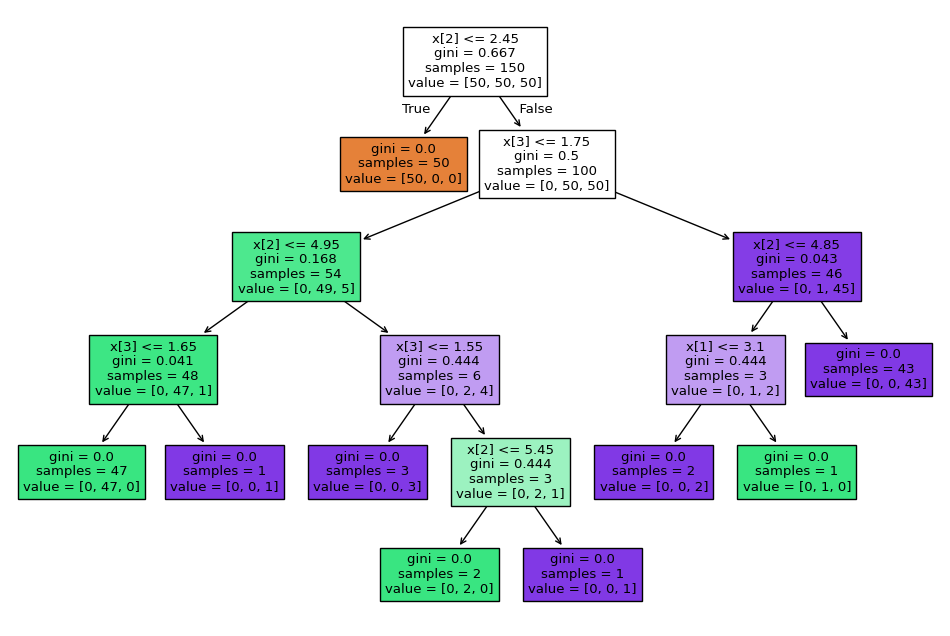

In [148]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True)
plt.show()


#### 2. Classification trees: implement your own method
This tutorial is suited for **a better understanding of logistic regression**. I encourage you to try to understand the code, but this will not be required for the final grade.

In [149]:
!pip install ucimlrepo

In [150]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
balance_scale = fetch_ucirepo(id=12) 

# data (as pandas dataframes) 
X = balance_scale.data.features 
y = balance_scale.data.targets 
#balance_data = pd.concat([balance_targets, balance_features], axis=1)
#print(balance_data.head())

# metadata 
print(balance_scale.metadata) 
  
# variable information 
print(balance_scale.variables) 

{'uci_id': 12, 'name': 'Balance Scale', 'repository_url': 'https://archive.ics.uci.edu/dataset/12/balance+scale', 'data_url': 'https://archive.ics.uci.edu/static/public/12/data.csv', 'abstract': 'Balance scale weight & distance database', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 625, 'num_features': 4, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1976, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C5488X', 'creators': ['R. Siegler'], 'intro_paper': None, 'additional_info': {'summary': 'This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The corr

In [151]:
# Function to split the dataset into features and target variables
def splitdataset(X, y):

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=100)

    return X, y, X_train, X_test, y_train, y_test

In [152]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [153]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [154]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [155]:
from sklearn import tree
from sklearn.tree import plot_tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

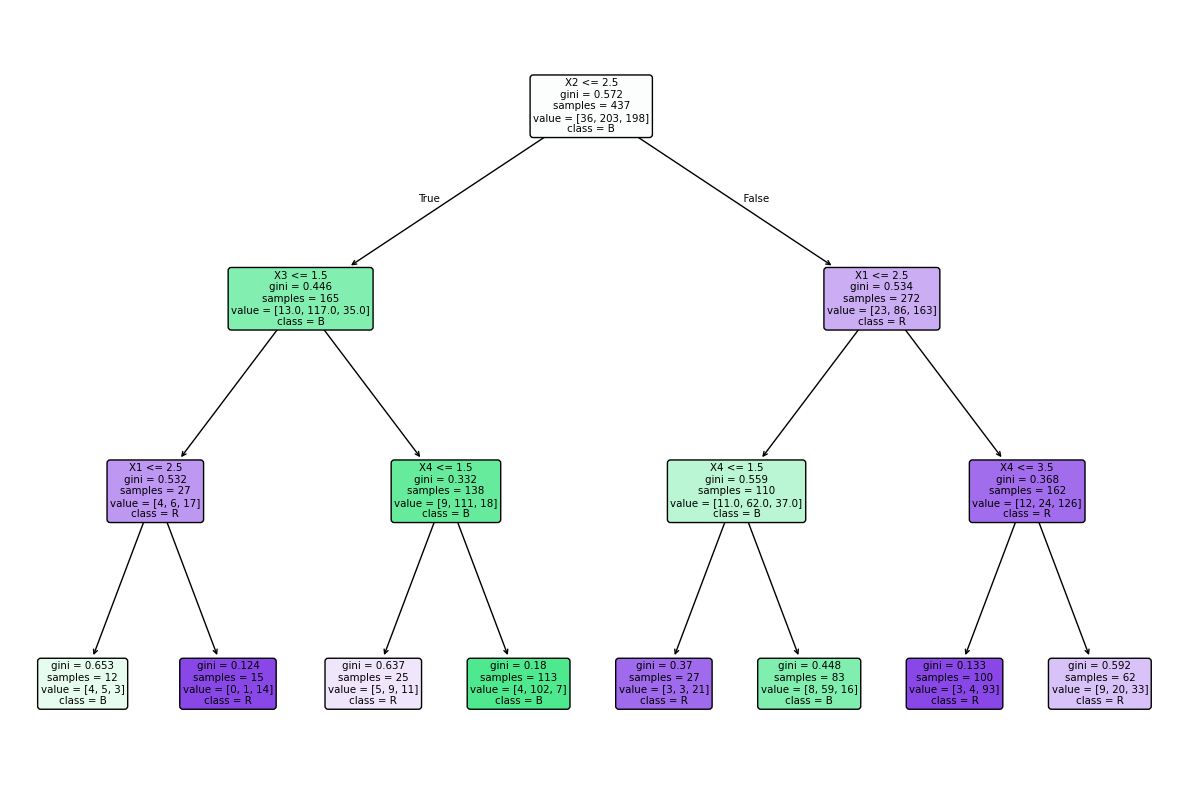

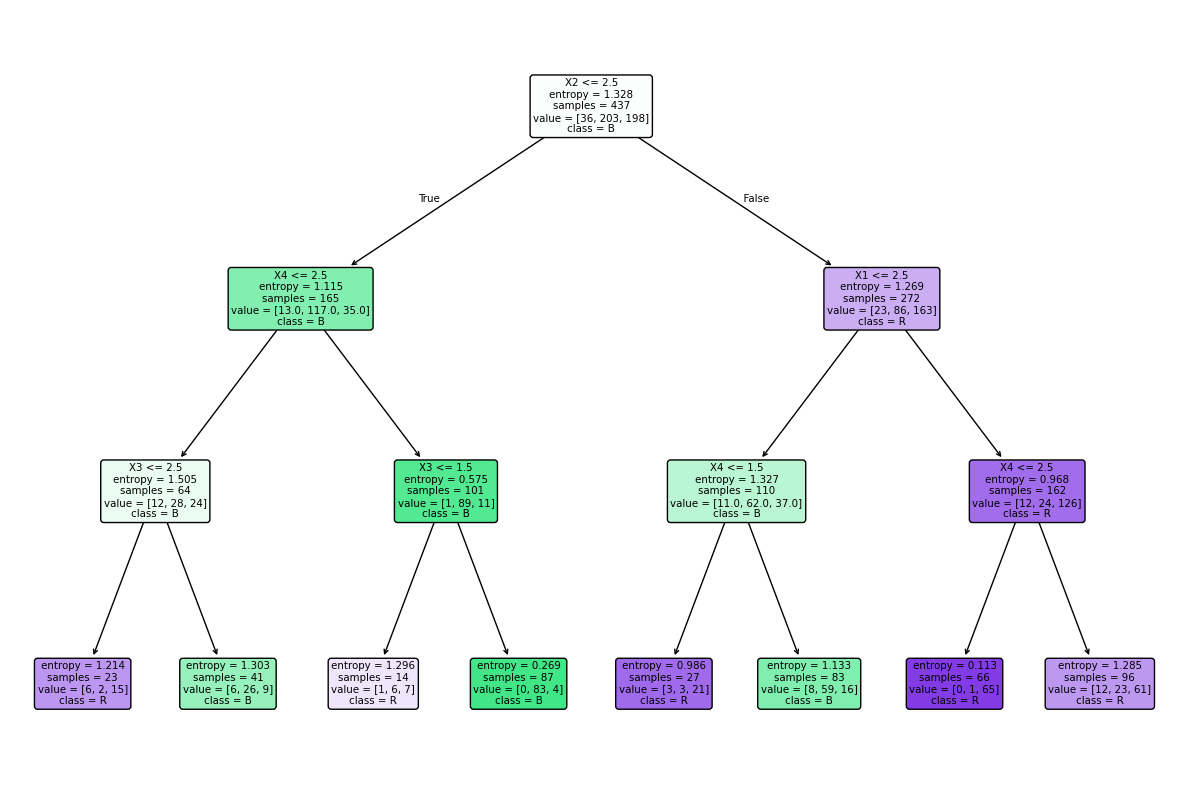

In [156]:
X, Y, X_train, X_test, y_train, y_test = splitdataset(X, y)

clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = train_using_entropy(X_train, X_test, y_train)

# Visualizing the Decision Trees
plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])